In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:

HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnpalette = [PCOLOR, HCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'DON', 'RDON', 'DIN']
cccpalette = [PCOLOR, HCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [3]:
mpalette = sns.color_palette('Accent', n_colors=8).as_hex()
#mpalette = [mpalette[0]] + mpalette[4:7]

AXENIC_COLOR = '#47B07B' # axenic (green ) 
COCULTURE = '#7D7D7D' # co-culture (grey) #7D7D7D
CC_COLOR = '#1B73D3'
#9479b9
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
mpalette = [PRO_COLOR,ALT_COLOR, AXENIC_COLOR, COCULTURE, CC_COLOR ]
torder = ['med4', 'co-culture']
tpal = [PCOLOR_light, PRO_COLOR]
forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]

sns.color_palette(fpal)

[(0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.9921568627450981, 0.6509803921568628, 0.36470588235294116)]

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'cc1A3 N budget.ipynb',
 'cc1A3 notebook.ipynb',
 'CC1A3_cell_count.xlsx',
 'CC1A3_N_budget.xlsx',
 'data',
 'Osnat_CC1A3_N analysis.xlsx',
 '~$CC1A3_N_budget.xlsx',
 '~$Osnat_CC1A3_N analysis.xlsx']

In [5]:
df = pd.read_excel('Osnat_CC1A3_N analysis.xlsx')

In [6]:
df2 =pd.read_excel('CC1A3_N_budget.xlsx')

In [7]:
df2

,condition,Day,Sample,events HOT1A3,events med4,cells/ml HOT1A3,cells/ml med4,N biomass HOT1A3,N biomass med4
0,A,3,A0A,641.0,NaN,2.030087e+06,NaN,3.625156,NaN
1,A,3,A0B,2534.0,NaN,8.025337e+06,NaN,14.330958,NaN
2,A,3,A0C,2345.0,NaN,7.426762e+06,NaN,13.262074,NaN
3,A,5,A0A,2651.0,NaN,8.395883e+06,NaN,14.992648,NaN
4,A,5,A0B,3510.0,NaN,1.111639e+07,NaN,19.850696,NaN
...,...,...,...,...,...,...,...,...,...
323,P,84,P0B,NaN,38.0,NaN,1125.092524,NaN,0.001005
324,P,84,P0C,NaN,3.0,NaN,88.823094,NaN,0.000079
325,P,89,P0A,NaN,4.0,NaN,118.430792,NaN,0.000106
326,P,89,P0B,NaN,130.0,NaN,3849.000740,NaN,0.003437


In [8]:
df.columns

Index(['condition', 'Day', 'Sample', 'events HOT1A3', 'events med4',
       'cells/ml HOT1A3', 'cells/ml med4', 'N biomass HOT1A3',
       'N biomass med4', 'NH4', 'DON', 'Total N', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [9]:
df2 = pd.concat([df, df2], ignore_index=True)

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


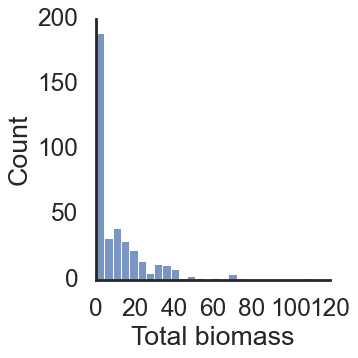

In [26]:
df2['Total biomass'] = df2['N biomass HOT1A3'].fillna(0) + df2['N biomass med4'].fillna(0)
sns.displot(data=df2, x='Total biomass', label='total biomass')

In [27]:
df2.nlargest(10, 'Total biomass')

,condition,Day,Sample,events HOT1A3,events med4,cells/ml HOT1A3,cells/ml med4,N biomass HOT1A3,N biomass med4,NH4,...,Total N,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Total biomass
173,C,15,C0A,6958.0,23240.0,2.758375e+07,6.830272e+07,49.256690,60.984570,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.241260
184,C,19,C0A,1698.0,23966.0,7.157007e+06,6.808523e+07,12.780370,60.790381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.570752
164,C,11,C1A,2279.0,20713.0,8.867704e+06,6.192227e+07,15.835186,55.287743,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.122929
14,C,11,C1A,2279.0,20713.0,8.867704e+06,6.192227e+07,15.835186,55.287743,20.26688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.122929
188,C,20,C0B,1141.0,24410.0,4.809273e+06,6.934659e+07,8.587987,61.916599,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.504586
178,C,18,C0A,1315.0,23043.0,5.542677e+06,6.546307e+07,9.897637,58.449168,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.346805
191,C,21,C0B,291.0,22617.0,1.226554e+06,6.425284e+07,2.190275,57.368608,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.558883
185,C,19,C0B,429.0,20373.0,1.808219e+06,5.787784e+07,3.228963,51.676644,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.905606
194,C,24,C0B,1476.0,14742.0,5.342986e+06,4.508257e+07,9.541047,40.252294,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.793341
183,C,18,C2C,896.0,15967.0,3.552032e+06,4.692726e+07,6.342914,41.899339,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.242252


In [10]:
mdf = df2.melt(
    id_vars=['condition', 'Day', 'Sample',],
    value_vars=['N biomass HOT1A3',
       'N biomass med4', 'NH4', 'DON',],
    value_name='umol N / L',
    
)
mdf

,condition,Day,Sample,variable,umol N / L
0,A,0,estimated,N biomass HOT1A3,17.857143
1,A,11,A1A,N biomass HOT1A3,9.859644
2,A,11,A1B,N biomass HOT1A3,5.405781
3,A,11,A1C,N biomass HOT1A3,17.488883
4,A,18,A2A,N biomass HOT1A3,0.891972
...,...,...,...,...,...
1499,P,84,P0B,DON,NaN
1500,P,84,P0C,DON,NaN
1501,P,89,P0A,DON,NaN
1502,P,89,P0B,DON,NaN


In [37]:
df2.loc[df2.Day>0].groupby('condition').NH4.max()

condition
A    275.257770
C     44.657028
P    157.691672
Name: NH4, dtype: float64

In [11]:
mdf['g'] = mdf.condition.map({
    'A': 'Alteromonas',
    'C' : 'Coculture',
    'P' : 'Prochlorococcus',
})

In [12]:
mNcols = ['N biomass med4', 'N biomass HOT1A3', 'NH4', 'DON',]
mNpalette = [PRO_COLOR, HCOLOR, 'blue', 'pink']
sns.color_palette(mNpalette)

[(0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.0, 0.0, 1.0),
 (1.0, 0.7529411764705882, 0.796078431372549)]

In [13]:
mNcols_noDON = ['N biomass med4', 'N biomass HOT1A3', 'NH4', 
               ]
mNpalette_noDON = [PRO_COLOR, HCOLOR, 'blue', ]
sns.color_palette(mNpalette)

[(0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.0, 0.0, 1.0),
 (1.0, 0.7529411764705882, 0.796078431372549)]

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

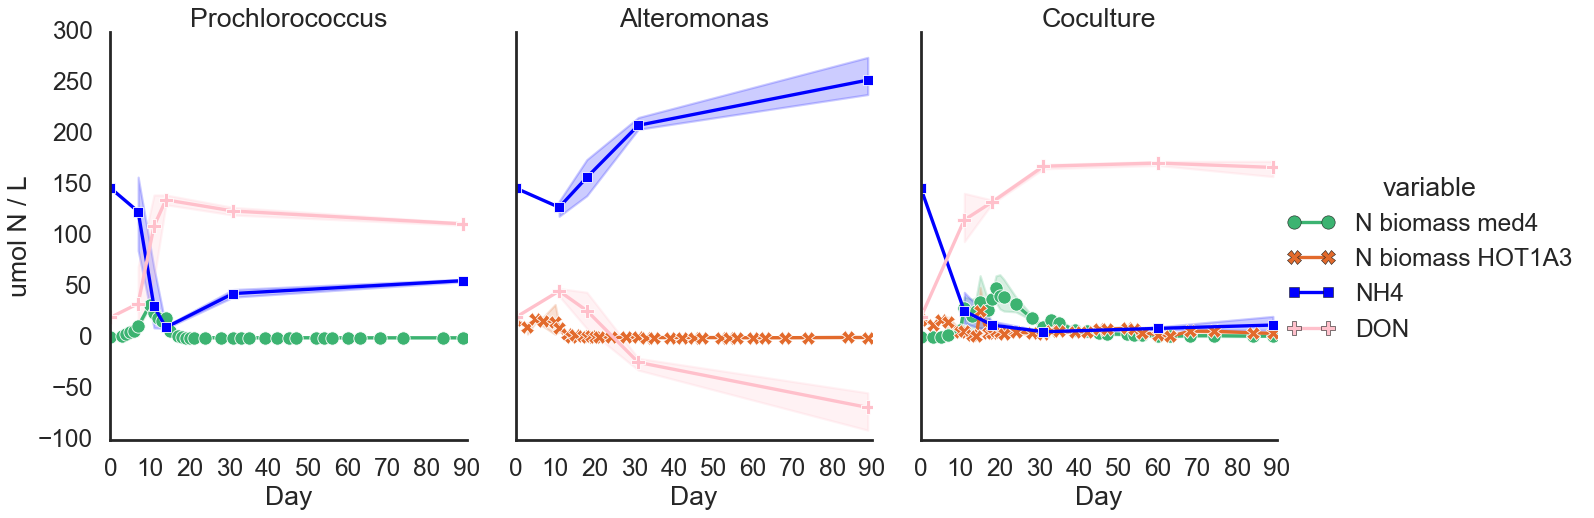

In [14]:
sns.relplot(
    data=mdf,
    x='Day', y='umol N / L',
    hue='variable', hue_order=mNcols, palette=mNpalette,
    style='variable', style_order=mNcols, markers=True, dashes=False,
    kind='line',
    col='g', col_order = [
 'Prochlorococcus',
 'Alteromonas',
 'Coculture',
            ],
    aspect=0.8, height=7,
).set_titles(col_template='{col_name}')

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

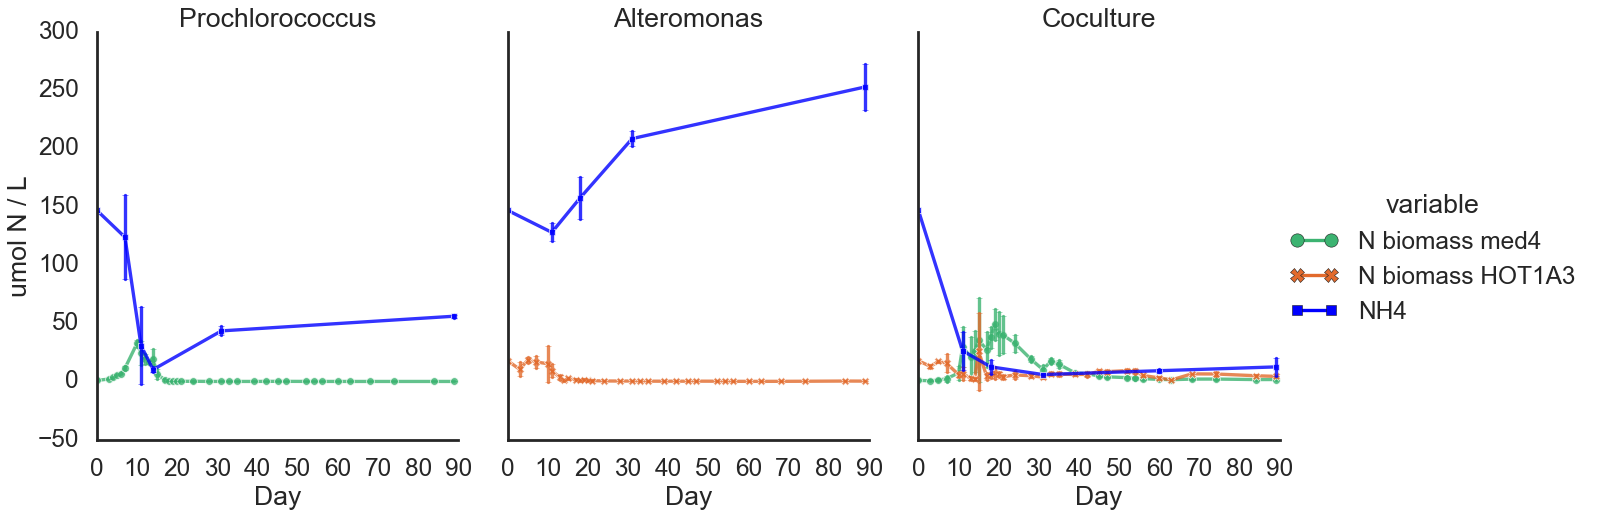

In [34]:
sns.relplot(
    data=mdf,
    x='Day', y='umol N / L',
    hue='variable', hue_order=mNcols_noDON, palette=mNpalette_noDON,
    style='variable', style_order=mNcols_noDON, markers=True, dashes=False,
    kind='line',
    col='g', col_order = [
 'Prochlorococcus',
 'Alteromonas',
 'Coculture',
            ],
    aspect=0.8, height=7, ms=7, alpha=0.8,
    err_style='bars',errorbar='sd'
).set_titles(col_template='{col_name}')

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

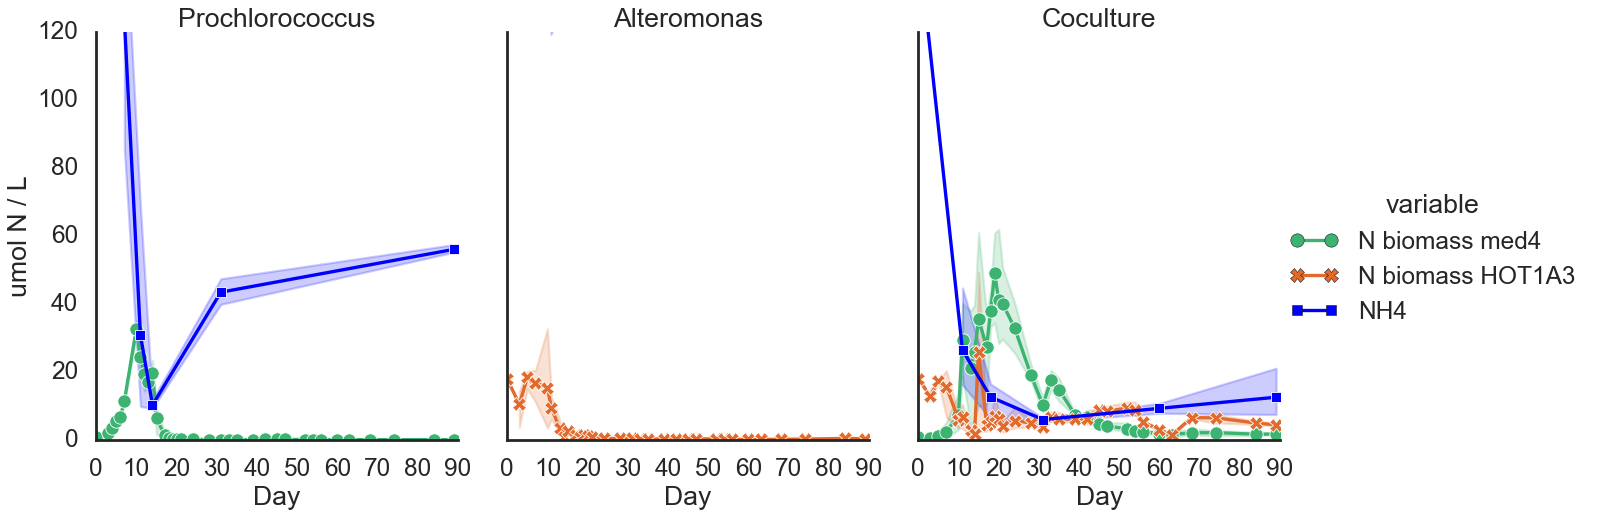

In [28]:
sns.relplot(
    data=mdf,
    x='Day', y='umol N / L',
    hue='variable', hue_order=mNcols_noDON, palette=mNpalette_noDON,
    style='variable', style_order=mNcols_noDON, markers=True, dashes=False,
    kind='line',
    col='g', col_order = [
 'Prochlorococcus',
 'Alteromonas',
 'Coculture',
            ],
    aspect=0.8, height=7,
).set_titles(col_template='{col_name}').set(ylim=(0,120))

In [17]:
rdf = np.log(df.groupby(['condition','Day'])['DON'].mean()).reset_index()

C:\Users\Osnat\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
rdf['t'] = rdf['Day']* 3600 * 24

In [19]:
rdf

,condition,Day,DON,t
0,A,0,2.995732,0
1,A,11,3.826195,950400
2,A,18,3.281934,1555200
3,A,31,NaN,2678400
4,A,89,NaN,7689600
5,C,0,2.995732,0
6,C,11,4.751065,950400
7,C,18,4.891528,1555200
8,C,31,5.126288,2678400
9,C,60,5.144782,5184000
